In [47]:
import pandas as pd
import numpy as np

In [48]:
grades = pd.read_csv('/Users/davis/Documents/GitHub/GradeCalculator/grades.csv')

In [49]:
grades

,Id,Student,Math,Science,English,History
0,1,Alice,85,92,78,88
1,2,Bob,76,84,91,82
2,3,Charles,92,88,95,90
3,4,Diana,68,74,82,76
4,5,Eve,88,95,89,93
5,6,Roberta,79,68,93,89


In [50]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       6 non-null      int64 
 1   Student  6 non-null      object
 2   Math     6 non-null      int64 
 3   Science  6 non-null      int64 
 4   English  6 non-null      int64 
 5   History  6 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 416.0+ bytes


In [51]:
#first 5 rows
grades.head()

,Id,Student,Math,Science,English,History
0,1,Alice,85,92,78,88
1,2,Bob,76,84,91,82
2,3,Charles,92,88,95,90
3,4,Diana,68,74,82,76
4,5,Eve,88,95,89,93


In [52]:
#last five rows
grades.tail()

,Id,Student,Math,Science,English,History
1,2,Bob,76,84,91,82
2,3,Charles,92,88,95,90
3,4,Diana,68,74,82,76
4,5,Eve,88,95,89,93
5,6,Roberta,79,68,93,89


In [53]:
#statistical summary
print('Statistical Summary:')
grades.describe()

Statistical Summary:


,Id,Math,Science,English,History
count,6.000000,6.000000,6.000000,6.00000,6.000000
mean,3.500000,81.333333,83.500000,88.00000,86.333333
std,1.870829,8.755950,10.540398,6.63325,6.218253
min,1.000000,68.000000,68.000000,78.00000,76.000000
25%,2.250000,76.750000,76.500000,83.75000,83.500000
50%,3.500000,82.000000,86.000000,90.00000,88.500000
75%,4.750000,87.250000,91.000000,92.50000,89.750000
max,6.000000,92.000000,95.000000,95.00000,93.000000


In [54]:
#average across all subjects for each student
grades['Average'] = grades[['Math', 'Science', 'English', 'History']].mean(axis=1)

In [55]:
print('Student Averages: ')
grades[['Student', 'Math', 'Science', 'English', 'History', 'Average']]

Student Averages: 


,Student,Math,Science,English,History,Average
0,Alice,85,92,78,88,85.75
1,Bob,76,84,91,82,83.25
2,Charles,92,88,95,90,91.25
3,Diana,68,74,82,76,75.00
4,Eve,88,95,89,93,91.25
5,Roberta,79,68,93,89,82.25


In [56]:
#Subject Average for each student
subject_average = grades[['Math', 'Science', 'English', 'History']].mean()

In [57]:
print('class average by subject:')
subject_average

class average by subject:


Math       81.333333
Science    83.500000
English    88.000000
History    86.333333
dtype: float64

In [60]:
# a letter grade function
def assign_grade(score):
    """
    Assign letter grade based on score
    A: 90-100, B: 80-89, C: 70-79, D: 60-69, F: Below 60 Below
    """
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

In [61]:
print(f"Score 95 = {assign_grade(95)}")
print(f"Score 77 = {assign_grade(77)}")
print(f"Score 43 = {assign_grade(43)}")

Score 95 = A
Score 77 = C
Score 43 = F


In [62]:
#create the letter grade column
grades['Grade'] = grades['Average'].apply(assign_grade)

In [63]:
#display results
print('Students with grades:')
grades[['Student', 'Average', 'Grade']]

Students with grades:


,Student,Average,Grade
0,Alice,85.75,B
1,Bob,83.25,B
2,Charles,91.25,A
3,Diana,75.00,C
4,Eve,91.25,A
5,Roberta,82.25,B


In [65]:
#Sort by average and show top 3 Students
grades.nlargest(3, 'Average')[['Student', 'Average', 'Grade']]

,Student,Average,Grade
2,Charles,91.25,A
4,Eve,91.25,A
0,Alice,85.75,B


In [68]:
#find students with average below 75
print('Students who need improvement:')
struggling_students = grades[grades['Average'] < 80]
struggling_students[['Student', 'Average', 'Grade']]

Students who need improvement:


,Student,Average,Grade
3,Diana,75.0,C


In [69]:
#Class grade distribution
print('📊 CLASS STATISTICS')
print('=' * 40)
print(f"Highest Average: {grades['Average'].max():.2f}")
print(f"Lowest Average: {grades['Average'].min():.2f}")
print(f"Overall Class Average: {grades['Average'].mean():.2f}")
print(f"Median Score: {grades['Average'].median():.2f}")
print(f"Standard Deviation: {grades['Average'].std():.2f}")
print('\nGrade Distribution:')
grades['Grade'].value_counts().sort_index()

📊 CLASS STATISTICS
Highest Average: 91.25
Lowest Average: 75.00
Overall Class Average: 84.79
Median Score: 84.50
Standard Deviation: 6.15

Grade Distribution:


Grade
A    2
B    3
C    1
Name: count, dtype: int64

In [70]:
#visualize the data with matplotlib
import matplotlib.pyplot as plt

In [71]:
#count of each grade
grade_counts = grades['Grade'].value_counts().sort_index()

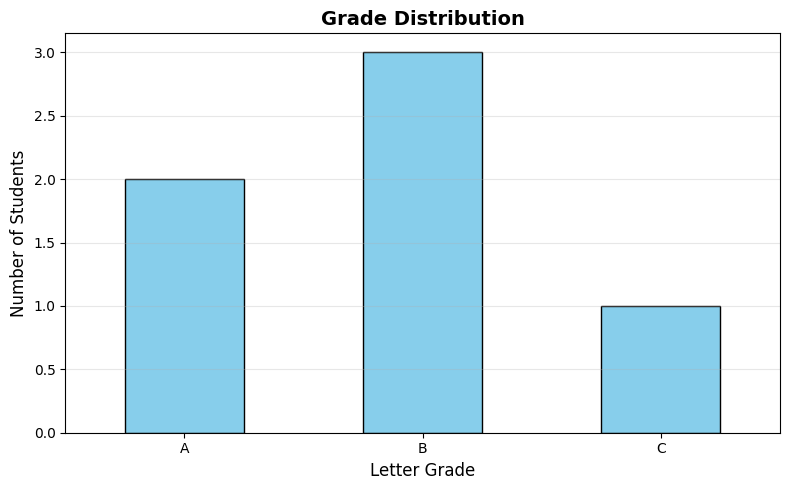

In [72]:
# a bar chart to visualize grade distribution
plt.figure(figsize=(8, 5))
grade_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Grade Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Letter Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

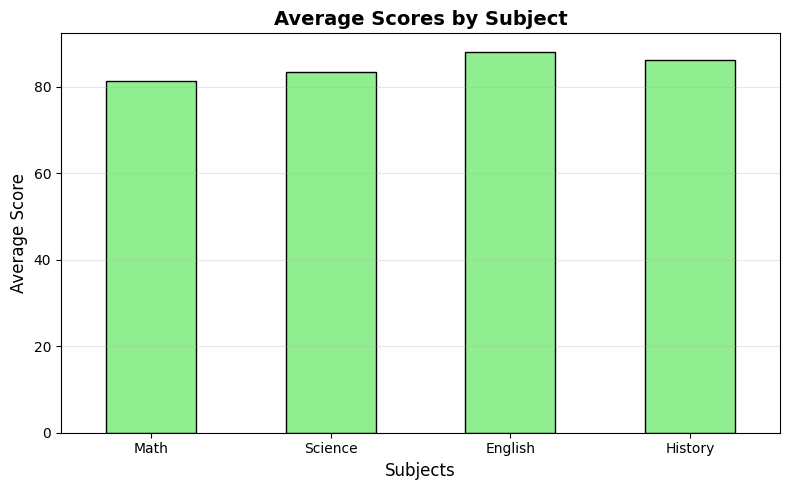

In [73]:
#compare average scores across subjects with a bar chart
subject_avg = grades[['Math', 'Science', 'English', 'History']].mean()
plt.figure(figsize=(8, 5))
subject_avg.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Scores by Subject', fontsize=14, fontweight='bold')
plt.xlabel('Subjects', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [74]:
print("\nSubject Averages:")
subject_avg


Subject Averages:


Math       81.333333
Science    83.500000
English    88.000000
History    86.333333
dtype: float64